# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("data.csv")

In [10]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)

In [11]:
data

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           0.2419  ...        25.380          17.33           184.60   
1           0.1812  ...        24.990          23.41           158.80   
2           0.2069  ...        23.570          25.53           152.50   
3           0.2597  ...        14.910          26.50            98.87   
4           0.1809  ...        22.540          16.67           152.20   
..             ...  ...           ...            ...              ...   
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...         

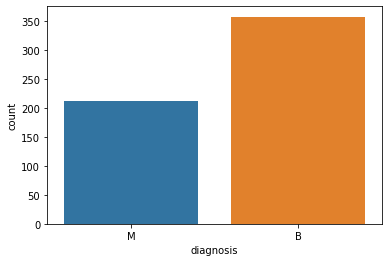

In [12]:
sns.countplot(data["diagnosis"])

In [13]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [14]:
data["diagnosis"] = [1 if i.strip() == "M" else 0 for i in data.diagnosis]

In [15]:
len(data)

569

In [16]:
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [17]:
data.shape

(569, 31)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [19]:
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [20]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## EDA

In [21]:
corr_matrix = data.corr()

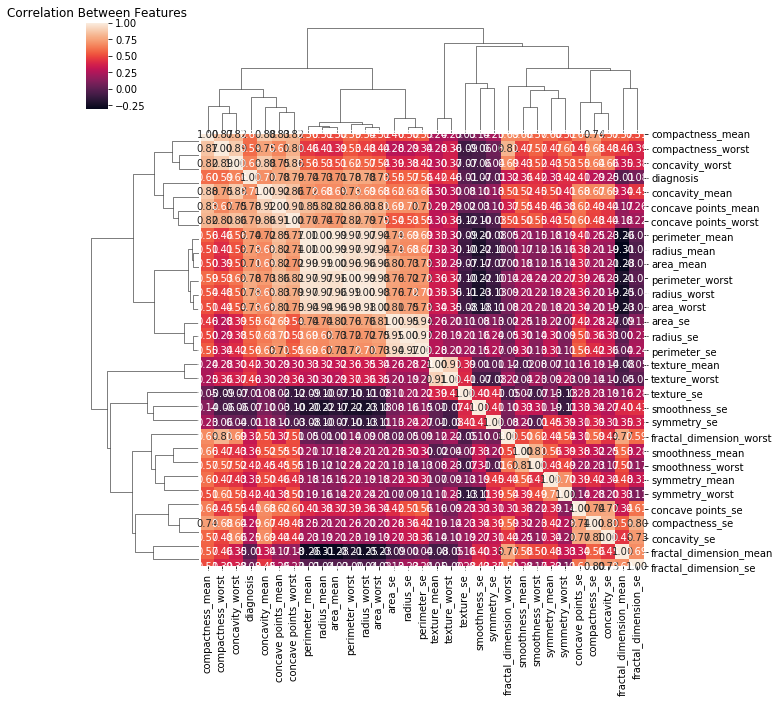

In [22]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

In [23]:
threshold = 0.5

Text(0.5, 1, 'Correlation Between Features w Corr Threshold 0.5')

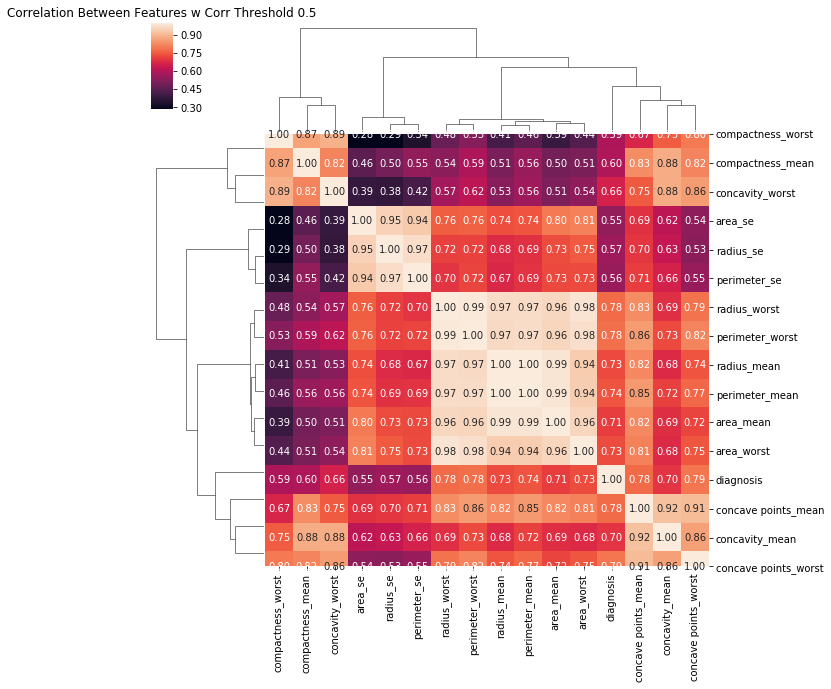

In [24]:
Filter= np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[Filter].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.5")

In [25]:
data_melted = pd.melt(data, id_vars = "diagnosis",
                      var_name = "features",
                      value_name = "value")

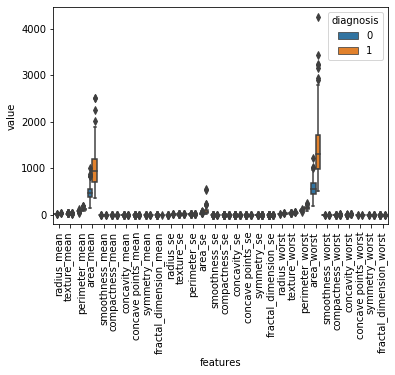

In [26]:
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

In [27]:
#standardization-normalization

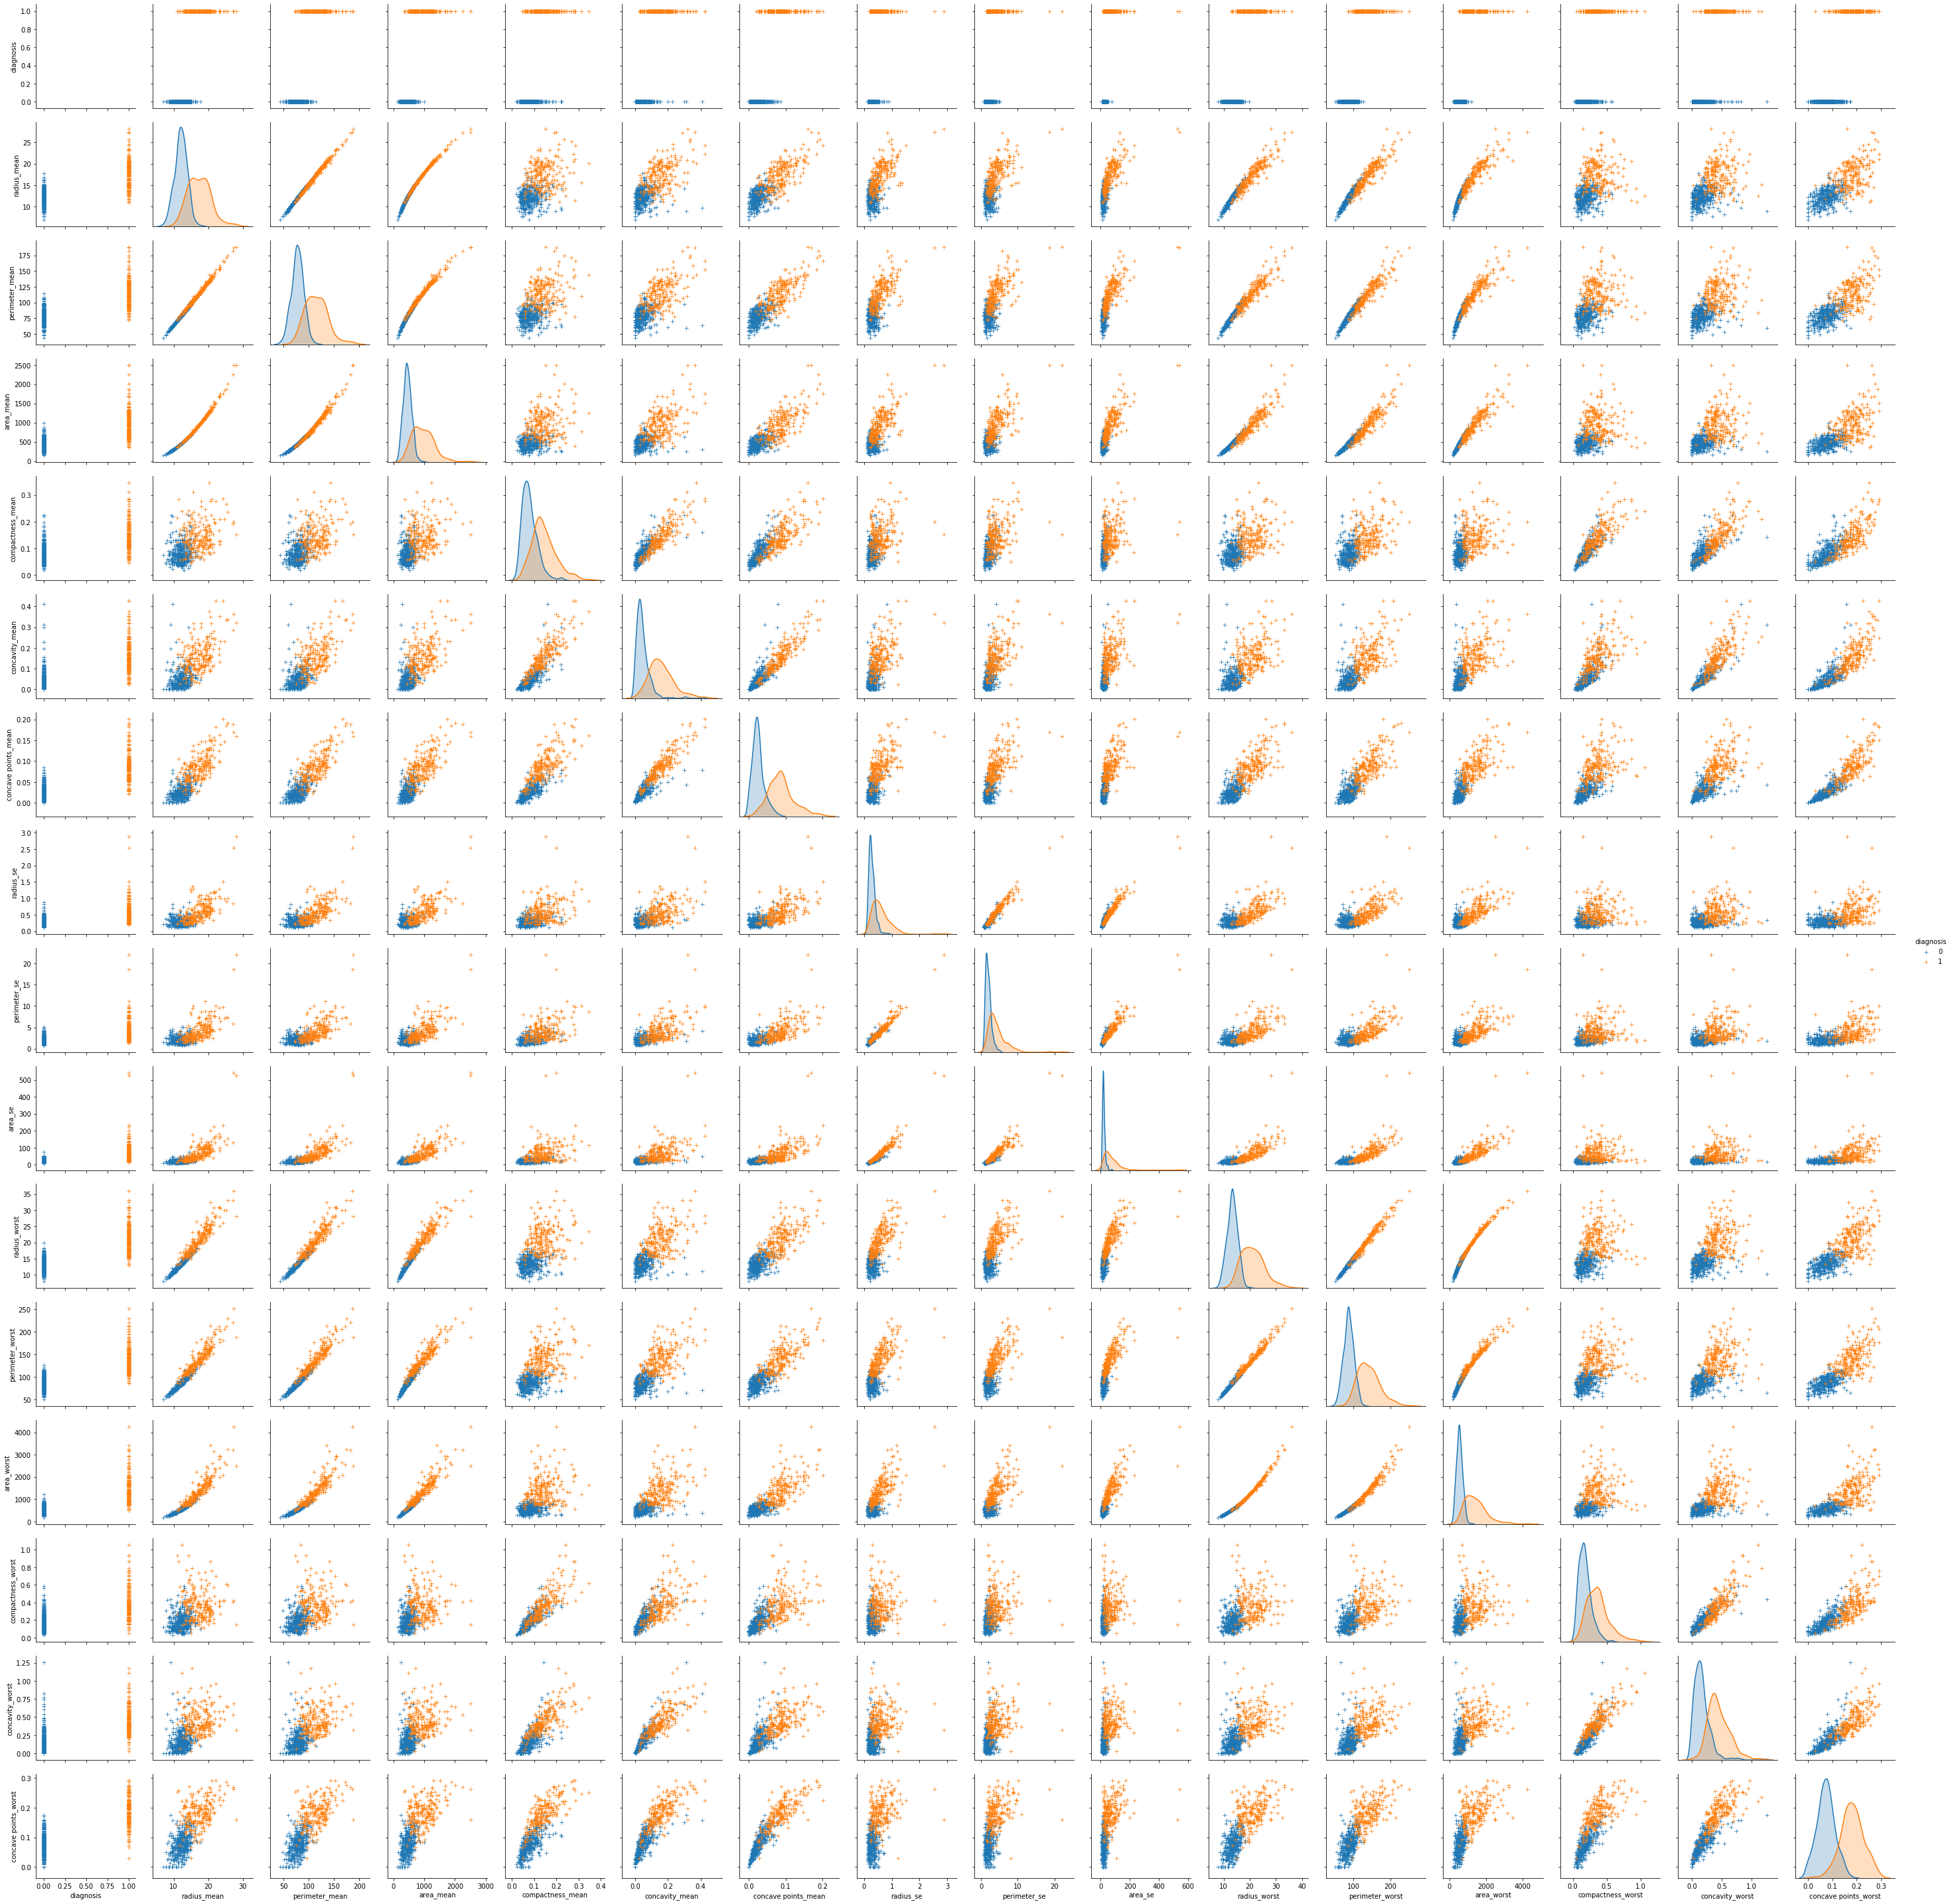

In [28]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "diagnosis")
plt.show()

## Outlier Detection

In [29]:
y = data.diagnosis
x = data.drop("diagnosis",axis=1)
columns = x.columns.tolist()

In [30]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_

In [31]:
outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

In [32]:
outlier_score

score
0   -1.422440
1   -1.066782
2   -0.978948
3   -1.596933
4   -1.069936
..        ...
564 -1.330082
565 -0.997906
566 -0.997441
567 -0.993730
568 -1.323238

[569 rows x 1 columns]

In [33]:
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


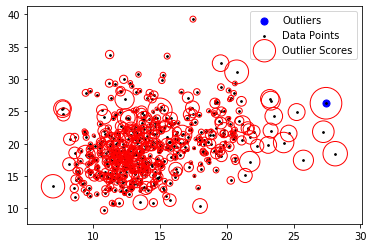

In [34]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")
radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

In [35]:
#Drop Outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

## Train,Test,Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

## Standardization

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
X_train_df = pd.DataFrame(X_train, columns = columns)

X_train_df_describe= X_train_df.describe()
X_train_df_describe

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  3.970000e+02  3.970000e+02    3.970000e+02  3.970000e+02   
mean   1.789780e-17 -2.863648e-16   -7.243017e-17 -2.245615e-16   
std    1.001262e+00  1.001262e+00    1.001262e+00  1.001262e+00   
min   -1.712388e+00 -2.175361e+00   -1.632924e+00 -1.303791e+00   
25%   -7.039450e-01 -7.291157e-01   -7.065592e-01 -6.765379e-01   
50%   -2.446426e-01 -1.109439e-01   -2.549616e-01 -2.989145e-01   
75%    4.919745e-01  5.648931e-01    5.336490e-01  3.852569e-01   
max    4.033514e+00  4.645288e+00    4.063861e+00  5.327298e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     3.970000e+02      3.970000e+02    3.970000e+02         3.970000e+02   
mean     -2.852462e-17     -2.645519e-16    2.544844e-17         8.585352e-17   
std       1.001262e+00      1.001262e+00    1.001262e+00         1.001262e+00   
min      -2.404872e+00     -1.638974e+00   -1.126020e+00        -1.291511e+00   
25%      -7.086599e-01     -7.677983e-01   -7.505222e-01        -7.462174e-01   
50%      -9.870612e-02     -2.500035e-01   -3.559314e-01        -3.888829e-01   
75%       6.086412e-01      5.418139e-01    4.663710e-01         6.740944e-01   
max       4.767417e+00      4.097233e+00    4.417475e+00         4.049923e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   3.970000e+02            3.970000e+02  ...  3.970000e+02   
mean   -1.639187e-15            6.331347e-16  ...  1.166154e-16   
std     1.001262e+00            1.001262e+00  ...  1.001262e+00   
min    -2.340956e+00           -1.731378e+00  ... -1.554165e+00   
25%    -6.923019e-01           -7.154003e-01  ... -6.821946e-01   
50%    -3.575803e-02           -1.774476e-01  ... -2.715302e-01   
75%     5.587789e-01            4.845408e-01  ...  4.880926e-01   
max     4.490747e+00            4.845302e+00  ...  3.590418e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   3.970000e+02     3.970000e+02  3.970000e+02      3.970000e+02   
mean   -4.810034e-16    -4.438096e-16 -9.620069e-17      6.988532e-16   
std     1.001262e+00     1.001262e+00  1.001262e+00      1.001262e+00   
min    -2.165353e+00    -1.558852e+00 -1.163524e+00     -2.217924e+00   
25%    -7.528643e-01    -7.019438e-01 -6.578384e-01     -7.527979e-01   
50%    -5.708877e-02    -2.809144e-01 -3.430225e-01     -4.097822e-02   
75%     6.757303e-01     5.339215e-01  2.884427e-01      6.097035e-01   
max     3.877586e+00     3.782128e+00  4.325859e+00      3.771406e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       3.970000e+02     3.970000e+02          3.970000e+02   
mean       -1.185729e-16     7.187086e-17         -7.243017e-17   
std         1.001262e+00     1.001262e+00          1.001262e+00   
min        -1.426295e+00    -1.351626e+00         -1.782104e+00   
25%        -6.715073e-01    -7.547935e-01         -7.847938e-01   
50%        -2.830139e-01    -2.487165e-01         -2.253839e-01   
75%         5.982844e-01     5.947450e-01          7.322025e-01   
max         4.615614e+00     3.461489e+00          2.511223e+00   

       symmetry_worst  fractal_dimension_worst  
count    3.970000e+02             3.970000e+02  
mean    -6.739641e-17             6.236265e-17  
std      1.001262e+00             1.001262e+00  
min     -2.098683e+00            -1.623010e+00  
25%     -6.687460e-01            -6.938485e-01  
50%     -1.273445e-01            -2.398587e-01  
75%      4.793437e-01             4.494271e-01  
max      5.979346e+00             5.130159e+00  

[8 rows x 30 columns]

In [39]:
X_train_df["diagnosis"] = y_train
X_train_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0      -0.126206     -0.106331       -0.139113  -0.243152         0.200584   
1       1.110155      0.350378        1.085508   0.972350         0.516224   
2      -1.565931     -0.763715       -1.524658  -1.225782         1.326652   
3       0.567081     -0.251647        0.550500   0.456043         0.061958   
4      -0.487293      0.172769       -0.488764  -0.531209        -0.840888   
..           ...           ...             ...        ...              ...   
392    -1.519135     -1.038202       -1.400385  -1.187933         0.106034   
393    -0.724166     -0.187062       -0.710351  -0.701096         1.269780   
394     0.041338     -0.535360       -0.072975  -0.065175        -2.278331   
395    -0.048211      0.110491       -0.038431  -0.160809         0.686840   
396    -0.568176      0.318086       -0.623991  -0.567614        -1.152263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.082163       -0.426589            -0.287204      -0.345793   
1            0.541814        0.433900             1.051074       0.668203   
2           -0.408721       -0.589335            -0.780730      -0.582878   
3            0.213772        0.101004             0.286230       0.190385   
4           -0.027839       -0.238905            -0.468792      -0.101412   
..                ...             ...                  ...            ...   
392          0.987715       -0.008229            -0.529056       0.339931   
393         -0.021946       -0.207733            -0.366317      -0.028463   
394         -1.494204       -1.031853            -1.125587      -1.097171   
395          0.205915        0.336486             0.424279      -0.509929   
396         -1.226467       -0.816504            -0.821613      -0.254606   

     fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                  0.802295  ...       0.026662        -0.235439   -0.316803   
1                 -0.276397  ...      -0.008771         0.960829    0.869669   
2                  1.903286  ...      -0.941303        -1.316628   -1.082299   
3                 -0.026932  ...      -0.031319         0.679317    0.656981   
4                 -0.025539  ...      -0.385649        -0.585008   -0.592932   
..                      ...  ...            ...              ...         ...   
392                3.780546  ...      -1.577487        -1.376024   -1.082299   
393                0.352143  ...       0.611307        -0.666059   -0.647204   
394               -1.242204  ...      -0.775413        -0.389807   -0.348523   
395                0.385591  ...       0.859338         0.212194   -0.009871   
396               -0.822712  ...       1.187898        -0.694829   -0.599349   

     smoothness_worst  compactness_worst  concavity_worst  \
0            0.456859           0.060010        -0.359469   
1            0.705777           0.841678         0.340937   
2            1.762589          -0.075060        -0.092330   
3           -0.027877          -0.160648         0.085079   
4           -1.180763          -0.212804        -0.375364   
..                ...                ...              ...   
392         -0.495145          -0.026916        -0.616353   
393          1.605378           0.122865         0.121484   
394         -2.024903          -1.319041        -1.153400   
395          1.277853           0.730011         0.734724   
396         -0.861973          -1.063210        -0.764536   

     concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                0.218125       -0.054096                 0.396185          0  
1                1.293014        0.281891                 0.093907          1  
2               -0.146403        0.068515                 1.048258          0  
3                0.112194       -0.144860                -0.103605          1  
4               -0.594274       -0.315243        

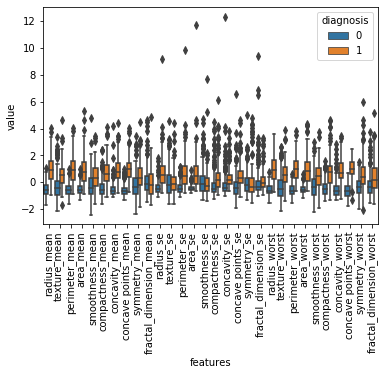

In [40]:
data_melted = pd.melt(X_train_df, id_vars = "diagnosis",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "diagnosis", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

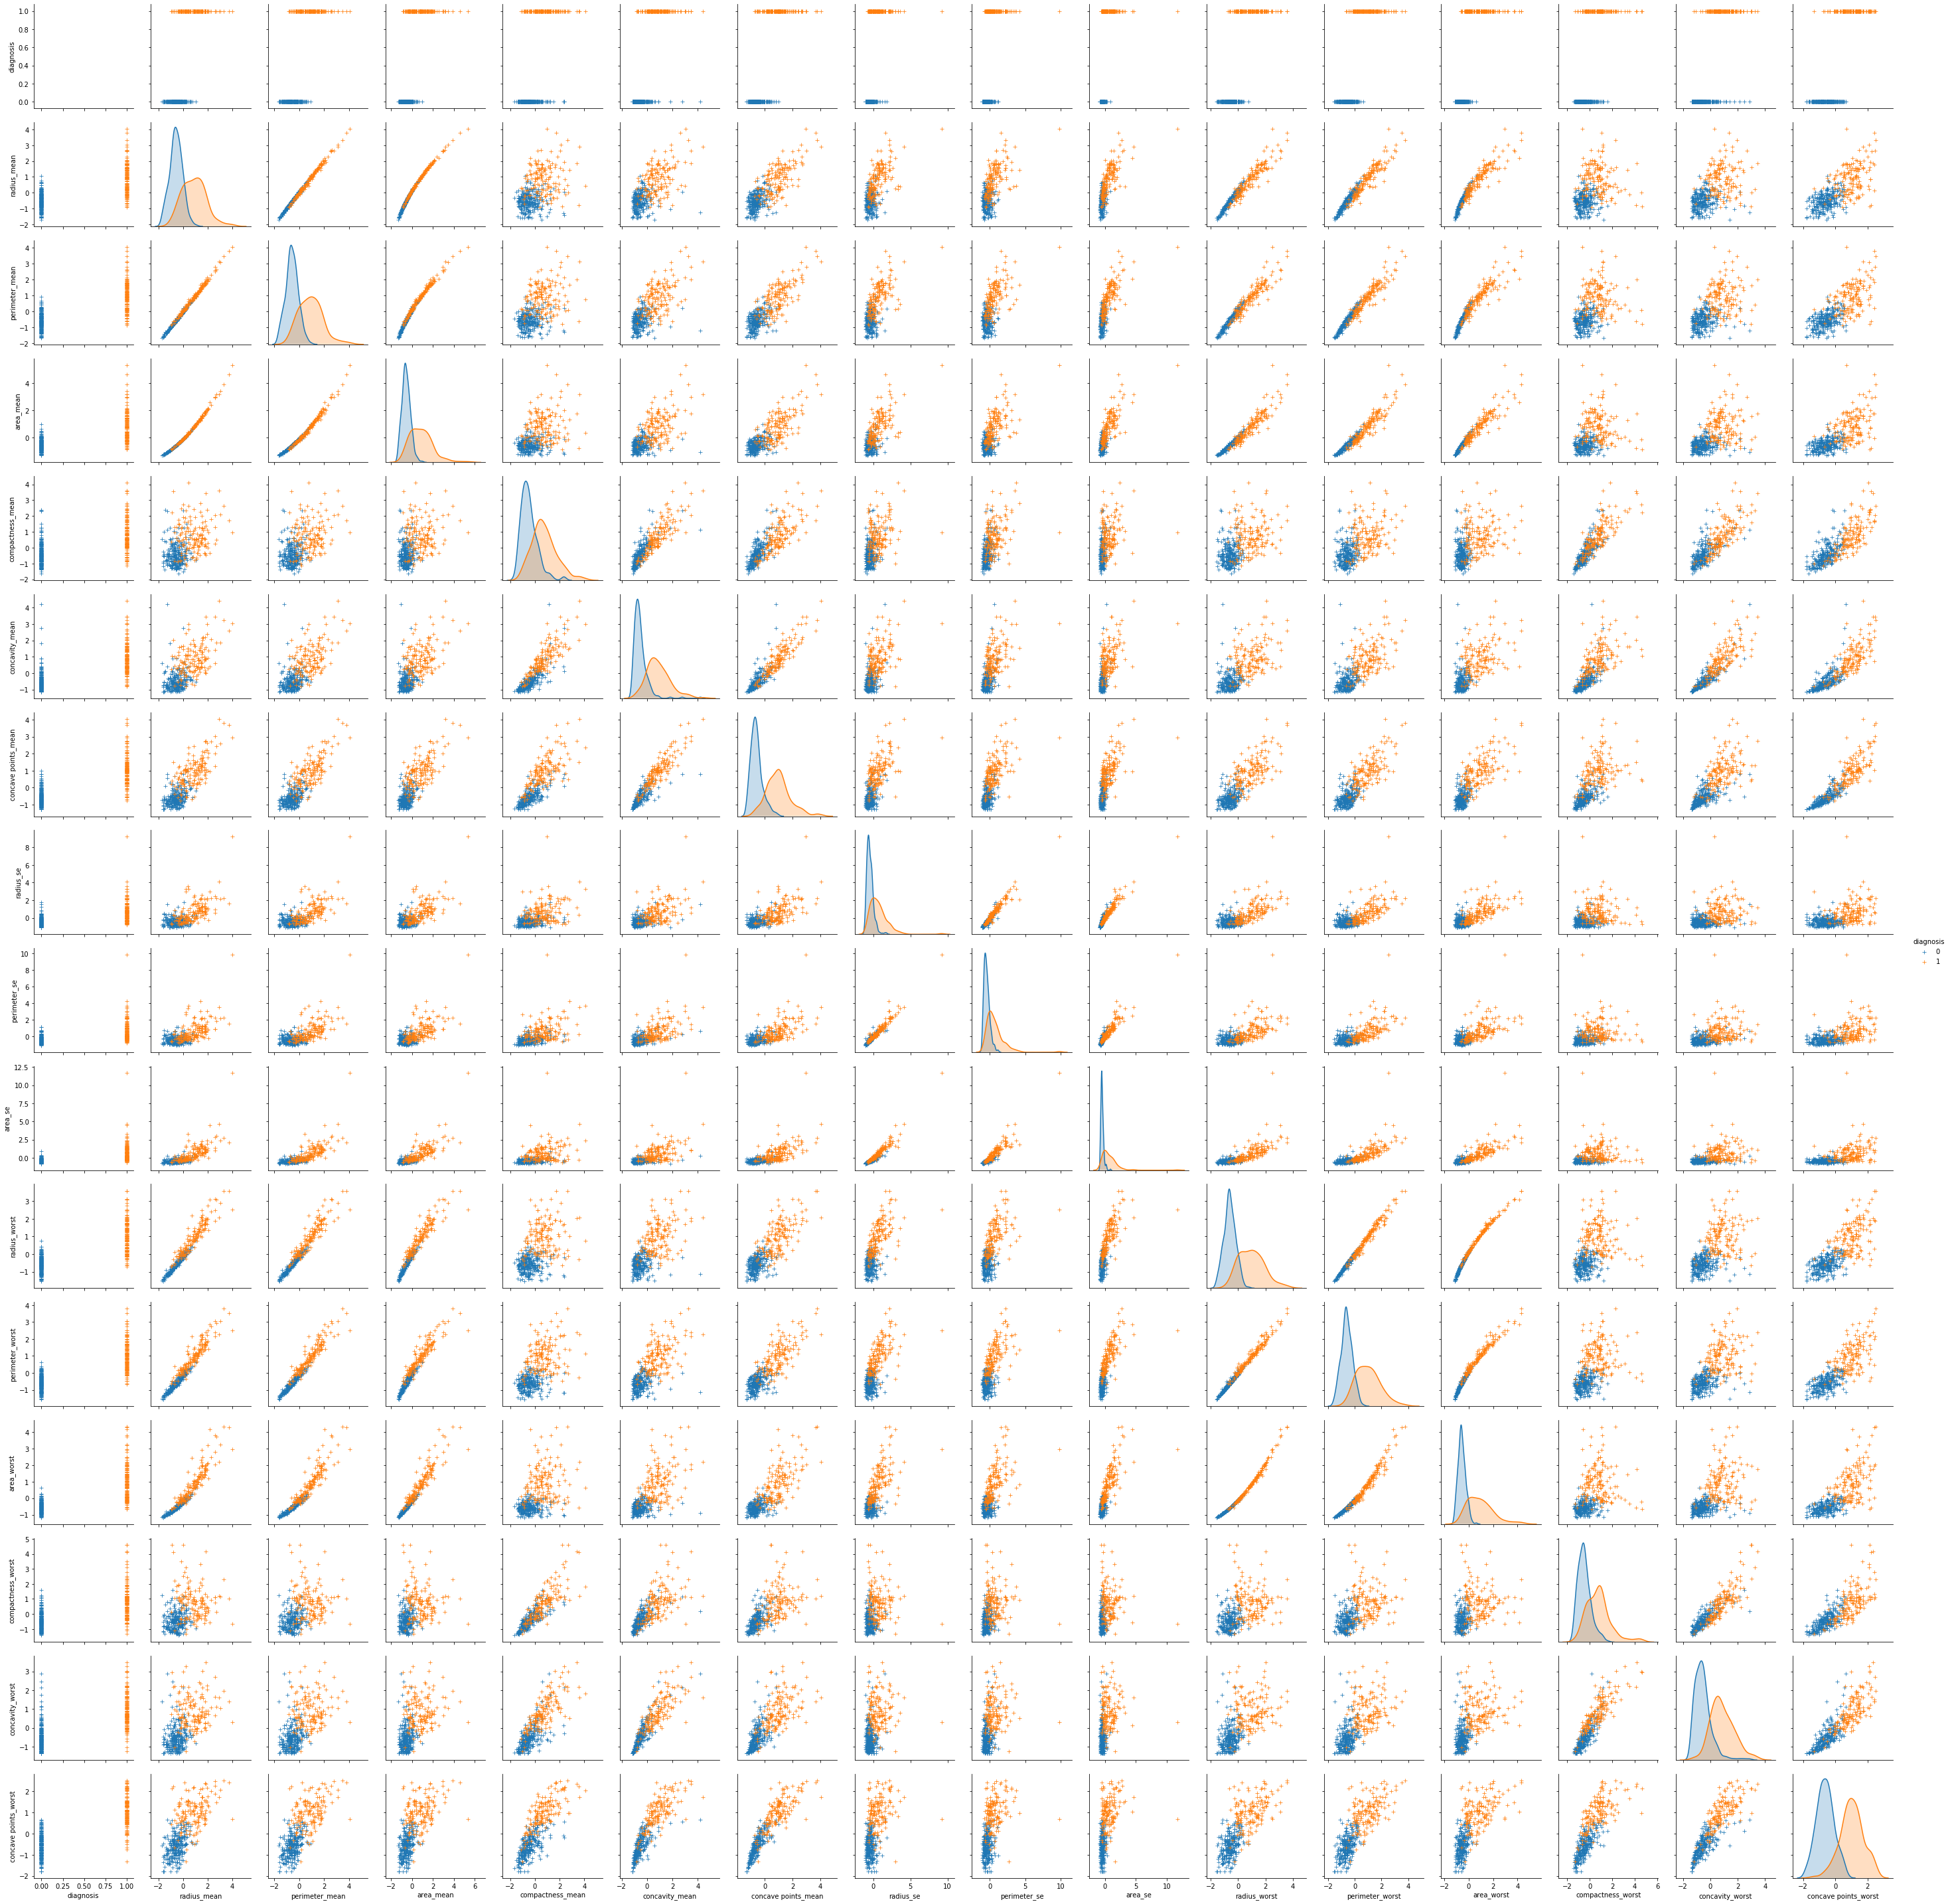

In [41]:
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "diagnosis")
plt.show()


## KNN

In [43]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9532163742690059
CM:  [[108   1]
 [  7  55]]
Basic KNN Acc:  0.9532163742690059


## Tuning 

In [62]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):
    
    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)
    
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)
    
    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(n_neighbors=2,weights='uniform')
    knn.fit(x_train, y_train)
    
    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)
    
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)
    
    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)
    
    return grid

In [63]:
grid = KNN_Best_Params(X_train, X_test, y_train, y_test)


Best training score: 0.9672544080604534 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9532163742690059, Train Score: 0.9697732997481109

CM Test:  [[108   1]
 [  7  55]]
CM Train:  [[248   0]
 [ 12 137]]


## PCA

In [64]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [65]:
pca = PCA(n_components = 2)
pca.fit(x_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [66]:
X_reduced_pca = pca.transform(x_scaled)

In [67]:
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])

In [68]:
pca_data["diagnosis"] = y

Text(0.5, 1.0, 'PCA: p1 vs p2')

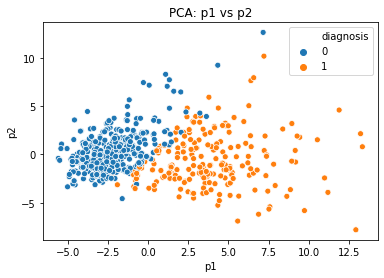

In [70]:
sns.scatterplot(x = "p1", y = "p2", hue = "diagnosis", data = pca_data)
plt.title("PCA: p1 vs p2")

## KNN WITH PCA

In [71]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced_pca, y, test_size = 0.3, random_state = 42)

In [72]:
grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, y_train_pca, y_test_pca)


Best training score: 0.9420654911838791 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.9546599496221663

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[248   0]
 [ 18 131]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

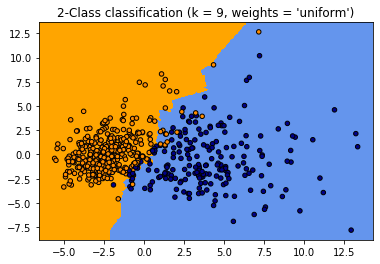

In [76]:
#Visualize
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])
h = .05 # step size in the mesh
X = X_reduced_pca

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

## NCA

Text(0.5, 1.0, 'NCA: p1 vs p2')

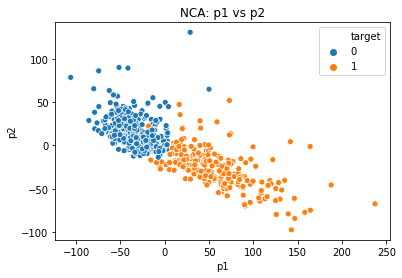

In [77]:
nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

In [79]:
X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = 0.3, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)


Best training score: 0.9874055415617129 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9883040935672515, Train Score: 0.9899244332493703

CM Test:  [[108   1]
 [  1  61]]
CM Train:  [[248   0]
 [  4 145]]


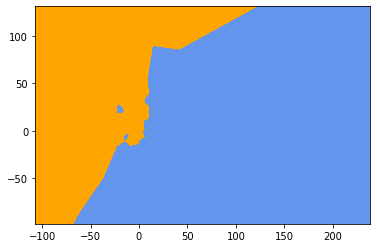

In [91]:
# visualize 
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

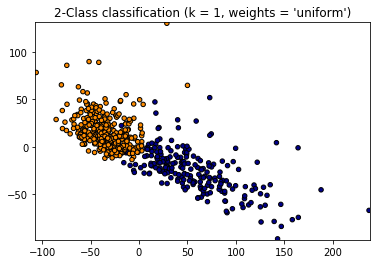

In [83]:
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

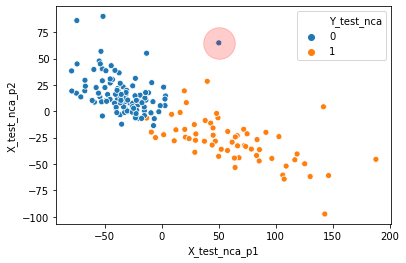

In [90]:
# %% find wrong decision
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)
test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca
plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)
diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)
